# TASK 1

In [1]:
# a) Use Pandas to load both the training set and the test set
import pandas as pd

trnData = pd.read_csv('trndata.csv')
tstData = pd.read_csv('tstdata.csv')

In [2]:
# Isolating Inputs and Labels from Test Data and Training Data
trainInputs = trnData.iloc[:,:12]
trainLabels = trnData.iloc[:,12]
testInputs = tstData.iloc[:,:12]
testLabels = tstData.iloc[:,12]

trainInputs.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12
0,0.3315,0.2156,0.6802,0.1434,0.6825,0.2720,0.6223,0.2092,0.7961,0.1530,0.5856,0.2573
1,0.0939,1.0089,0.0365,0.6944,0.0908,0.4961,0.0722,0.6521,-0.0130,0.6085,0.0631,0.6597
2,0.5184,0.2283,0.5300,0.6884,0.7456,0.6171,0.6136,0.5928,0.7678,0.6130,0.6705,0.5202
3,0.4208,0.6740,0.1651,0.7592,0.1810,0.5448,0.1707,0.7554,0.1635,0.5492,0.2598,0.6455
4,0.3130,0.6465,0.5908,0.6924,0.7664,0.6262,1.7177,0.0150,0.0851,1.9046,-0.0165,0.0221


In [3]:
testInputs.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12
0,0.5803,0.4980,0.8809,0.8215,1.0133,0.9187,0.8508,0.8496,0.9996,0.9670,0.9111,0.7814
1,0.0026,0.6084,0.2808,0.6282,0.2995,0.7513,-0.0107,1.7503,-0.0622,2.0704,-0.0999,0.1214
2,-0.0115,1.1193,0.2201,1.3189,0.2656,1.4039,-0.0067,1.7438,0.0013,2.0020,-0.0401,1.7797
3,-0.0536,1.0370,0.0558,1.2483,0.2640,1.1456,0.0140,1.7156,0.0125,1.9889,-0.0598,0.0709
4,0.5021,0.4270,0.6450,0.8325,0.7560,0.9235,0.7289,0.7352,0.7735,0.9298,0.6013,0.8842


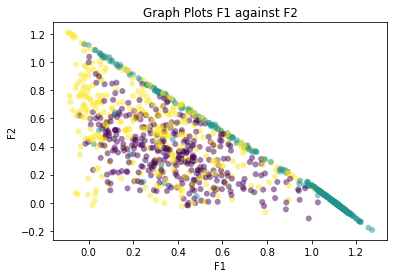

In [4]:
#b) Show one scatter plot, that is, two features of the training set against each other. 
# It is your choice to show which two features you want to use.
# You need to set the labelfor the x-axis and y-axis, separately, and use different colours to distinguish the three classes

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()

# using scatter graph to plot f2 against f3

plt.title("Graph Plots F1 against F2")
plt.xlabel("F1")
plt.ylabel("F2")

plt.scatter(trnData.iloc[:,0],trnData.iloc[:,1], c=trainLabels, edgecolor='none', alpha=0.5)
plt.show()

In [5]:
#c) Normalise the training set and the test set using StandardScaler()

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 

scaler = preprocessing.StandardScaler().fit(trainInputs)
scaled_trainData = scaler.transform(trainInputs)
scaled_testData = scaler.transform(testInputs)

In [6]:
#d)Perform a PCA analysis on the scaled training set
# Plot the scree plot to report variances captured by each principal component
import numpy as np
from sklearn.decomposition import PCA

pca = PCA()
trainingData = pca.fit_transform(scaled_trainData) 

pca.explained_variance_

array([5.2731389 , 2.36663461, 1.85618516, 0.80897277, 0.74169588,
       0.3417678 , 0.20270469, 0.16142449, 0.12289088, 0.09264559,
       0.03143982, 0.01251141])

In [7]:
pca.explained_variance_ratio_

array([0.43898881, 0.19702233, 0.15452741, 0.06734698, 0.06174618,
       0.02845217, 0.01687517, 0.01343859, 0.01023067, 0.00771275,
       0.00261736, 0.00104158])

Text(0, 0.5, 'The explained variance ratio')

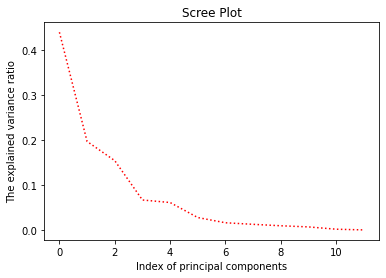

In [8]:
#plot scree plot
fig = plt.figure()
ax = plt.gca()
plt.plot(pca.explained_variance_ratio_, color='red', linestyle='dotted')
ax.set_title("Scree Plot")
ax.set_xlabel("Index of principal components")
ax.set_ylabel("The explained variance ratio")

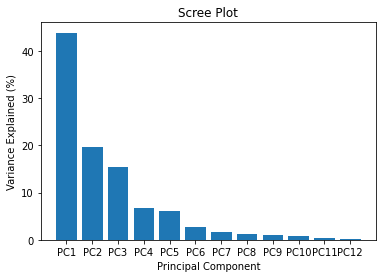

In [9]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
labels = ['PC' + str(n) for n in range(1, len(per_var) + 1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Variance Explained (%)')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

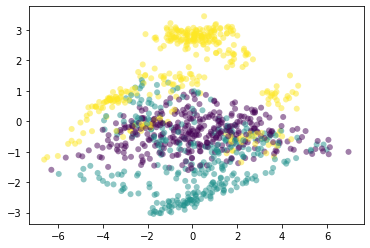

In [10]:
plt.scatter(trainingData[:,0],trainingData[:,1], c=trainLabels, edgecolor="none", alpha=0.5)

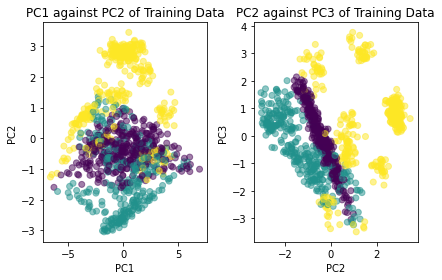

In [11]:
#e) Plot two subplots in one figure: one for projecting the training set in the projectionspace constructed
# using the first principal component (PC1) and the second principalcomponent (PC2); 
# the other one for projecting the training set in the projection space constructed using the
# second principal component (PC2) and the third principal compo-nent (PC3).
# You need to label the data using different colours in the picture according to its class
# and set the label for thex-axis andy-axis, separately. 

plt.subplot(1,2,1)
plt.title("PC1 against PC2 of Training Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.scatter(trainingData[:,0],trainingData[:,1], c=trainLabels, marker="o", alpha = 0.5)

plt.subplot(1,2,2)
plt.title("PC2 against PC3 of Training Data")
plt.xlabel("PC2")
plt.ylabel("PC3")
plt.scatter(trainingData[:,1],trainingData[:,2], c=trainLabels, marker="o", alpha = 0.5)

plt.tight_layout()
plt.show()

In [12]:
#f)Obtain projections of the test set by projecting the scaled test data on the same PCA
# space produced by the training set in Task 1

testingData = pca.fit(scaled_trainData).transform(scaled_testData)

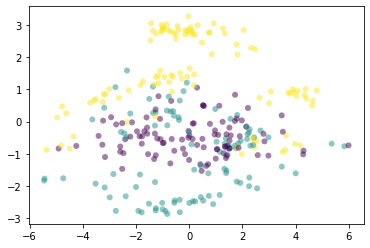

In [13]:
plt.scatter(testingData[:,0],testingData[:,1], c=testLabels,  marker="o", edgecolor="none", alpha=0.5)

# Task 2


In [14]:
#a)Divide the training dataset into a smaller training set (II)
#and a validation set using the train test split tfunction and report the number of points in each set. 
#Usually, we use 20%-30% of the total data points in the whole training set as the validation data.
# It is your choice on how to set the exact ratio 

from sklearn.model_selection import train_test_split

SXtrain, Xvalid, Sytrain, vtest = train_test_split(trainInputs, trainLabels, test_size =0.25, random_state=42)

print('The size of the smaller training set is:', SXtrain.shape)
print('The size of the validation set is: ', Xvalid.shape)

The size of the smaller training set is: (750, 12)
The size of the validation set is:  (250, 12)


In [15]:
#b) Normalise both the training set (II) and the validation set

scaler_s = preprocessing.StandardScaler().fit(SXtrain)

scaled_trnX = scaler_s.transform(SXtrain)
scaled_valX = scaler_s.transform(Xvalid)

# TASK 3

In [16]:
# i) Choosing the most suitable parameters 

from sklearn.svm import SVC
from sklearn import metrics

#  [C=50,γ=10]

svc1 = SVC(kernel='rbf', class_weight='balanced', C=50, gamma=10)

model1 = svc1.fit(scaled_trnX, Sytrain)

vyfit1 = model1.predict(scaled_valX)

print('Accuracy:', metrics.accuracy_score(vtest, vyfit1))

Accuracy: 0.772


In [17]:
#  [C=50,γ=20]

svc2 = SVC(kernel='rbf', class_weight='balanced', C=50, gamma=20)

model2 = svc2.fit(scaled_trnX, Sytrain)

vyfit2 = model2.predict(scaled_valX)

print('Accuracy:', metrics.accuracy_score(vtest, vyfit2))

Accuracy: 0.52


In [18]:
# [C=100,γ=10],

svc3 = SVC(kernel='rbf', class_weight='balanced', C=100, gamma=10)

model3 = svc3.fit(scaled_trnX, Sytrain)

vyfit3 = model3.predict(scaled_valX)

print('Accuracy:', metrics.accuracy_score(vtest, vyfit3))

Accuracy: 0.772


In [19]:
# [C=100,γ=20]

svc4 = SVC(kernel='rbf', class_weight='balanced', C=100, gamma=20)

model4 = svc4.fit(scaled_trnX, Sytrain)

vyfit4 = model4.predict(scaled_valX)

print('Accuracy:', metrics.accuracy_score(vtest, vyfit4))

Accuracy: 0.52


In [20]:
from sklearn.metrics import classification_report

# 2 combinations have the best accuracy [C=50,γ=10] and [C=100,γ=10]
# reported 1 combination only [c=50, y=10]

print(classification_report(vtest, vyfit1, trainLabels))

              precision    recall  f1-score   support

           1       0.60      1.00      0.75        85
           2       1.00      0.65      0.79        78
           1       0.60      1.00      0.75        85
           2       1.00      0.65      0.79        78
           3       1.00      0.66      0.79        87
           2       1.00      0.65      0.79        78
           3       1.00      0.66      0.79        87
           3       1.00      0.66      0.79        87
           3       1.00      0.66      0.79        87
           3       1.00      0.66      0.79        87
           2       1.00      0.65      0.79        78
           2       1.00      0.65      0.79        78
           1       0.60      1.00      0.75        85
           3       1.00      0.66      0.79        87
           2       1.00      0.65      0.79        78
           1       0.60      1.00      0.75        85
           3       1.00      0.66      0.79        87
           1       0.60    

C:\Users\msmoh\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=0      1
1      2
2      1
3      2
4      3
      ..
995    3
996    1
997    1
998    2
999    3
Name: L, Length: 1000, dtype: int64 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [21]:
scaler = preprocessing.StandardScaler().fit(trainInputs)

scaledX = scaler.transform(trainInputs)
scaledTestx = scaler.transform(testInputs)

In [22]:
svc_final = SVC(kernel='rbf', class_weight='balanced', C=50, gamma=10)

model_final = svc_final.fit(scaledX, trainLabels)
yfit_test = model_final.predict(scaledTestx)
print('Accuracy:', metrics.accuracy_score(testLabels, yfit_test))

Accuracy: 0.8666666666666667


In [23]:
# b) Advanced task - non-linear classification with features reduced using PCA
# Choosing the number of components
# i) Looking at the scree plot which you have produced in Task 1 (d), 
# how many prin-cipal components (PCs) you would like to use to do feature reduction? Explain thereason 

# Answer = 3 principle components because at 1-3 covers most variances. Every component after that does not cover enough

# ii) Reduce features for both the normalised training set (I) 
# and the normalised test setusing the PCA result from Task 1 with the number of principal components you
# have decided to use

reduced_feature_data_train = trainingData[:,:3]
reduced_feature_data_test = testingData[:,:3]

print('The size of the reduced feature training set is:', reduced_feature_data_train.shape)
print('The size of the reduced feature test set is:', reduced_feature_data_test.shape)

The size of the reduced feature training set is: (1000, 3)
The size of the reduced feature test set is: (300, 3)


In [24]:
print('train',reduced_feature_data_train)
print('test',reduced_feature_data_test)

train [[ 1.7525665   0.24970251 -1.23222812]
 [-2.80600794  0.67677533 -1.32311273]
 [ 0.58384047 -0.82271245 -0.08518155]
 ...
 [ 1.73913261 -1.20691542  1.72647523]
 [-0.72489913 -1.88007675 -0.3545893 ]
 [-2.67630836  1.05240255 -0.64298981]]
test [[ 7.12443270e-01 -1.32568728e+00  1.72059080e+00]
 [-3.21505348e+00  8.54866223e-01 -8.57377169e-01]
 [-5.36977104e+00 -8.83424069e-01  1.94392382e+00]
 [-4.77792336e+00  4.72568582e-01  1.05097797e-01]
 [-1.57117374e-01 -1.01009095e+00  1.12396519e+00]
 [ 4.80118273e-01  2.46046661e+00  1.22738036e+00]
 [-9.93451623e-01 -6.69202743e-01  3.43355026e-01]
 [ 5.16895693e-01  5.09294231e-01 -2.23699367e+00]
 [ 1.09034164e+00 -4.13170214e-01 -2.54637449e-01]
 [ 7.80183789e-01 -6.90292164e-02 -6.23129451e-01]
 [ 7.73170755e-01  2.76963918e+00  1.08902557e+00]
 [-1.60635807e+00  1.31416804e-01 -8.80042199e-01]
 [ 2.55259283e+00 -2.07549288e+00  1.50205999e-01]
 [-5.59636171e-01 -9.08099905e-01  9.43160354e-01]
 [ 3.06893072e+00  9.35464554e-01  

In [25]:
# iii) Do the classification using the Gaussian radial basis kernel SVM with parametervalues selected in Task 3 (a)
scaler_R = preprocessing.StandardScaler().fit(reduced_feature_data_train)
scaled_trainDataR = scaler_R.transform(reduced_feature_data_train)
scaled_testDataR = scaler_R.transform(reduced_feature_data_test)

In [26]:
svc_reduced_features = SVC(kernel='rbf', class_weight='balanced', C=50, gamma=10)

model_reduced_features = svc_reduced_features.fit(scaled_trainDataR, trainLabels)
yfit_test_R = model_reduced_features.predict(scaled_testDataR)
print('Accuracy:', metrics.accuracy_score(testLabels, yfit_test_R))

Accuracy: 0.9133333333333333
